In [1]:
import sys


#!{sys.executable} -m pip install s3fs

In [1]:
#import packages
import pandas as pd
import numpy as np

import math

#import data
Products = pd.read_csv('s3://kevinr/Product.csv')

EndUser = pd.read_csv('s3://kevinr/EndUser.csv')

Invoice = pd.read_csv('s3://kevinr/Invoice.csv')

Vendor = pd.read_csv('s3://kevinr/Vendor.csv')

Invoice



,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
0,UK,07/15/2019,E5ED03155812D08AF95C0DE6C6CFC756,1,74B2CFB8460D047F00CEC531319C7768,3285.863338,6,68D292A10256DB24405C56738F34D976
1,UK,06/06/2019,060AFA0DDB5F61AE58689DE4E1C45F66,1,9A5264F9ED8507F6F31112E24917452D,418.152176,1,4B39A21A1DD7881D4E165B9E90A4B831
2,UK,04/04/2019,95F78CBA7E223D0441DBE5EC9139C534,1,42A3AE06A8DC14FF62FDA90A55292CAA,60.578612,1,BE572735EA42E603C64667A191FAB9F6
3,UK,02/20/2019,14104E4FCCE6B2BF8A3CC8321DC1B5AE,1,F5B5DB9152AEE5BC633DEF60AC30203D,69.704712,6,E781130707853D0407533FC5433CF0BB
4,UK,11/07/2019,1176EAEA7C94F29A0335D9A5EE9D2A0D,1,59343B86E5B56460844F92C4A87ED4D1,566.165348,1,B9B2476B6EBE1C6657CACC1C836BDF6C
...,...,...,...,...,...,...,...,...
1135330,UK,05/21/2020,DAFB3D65054E0D78E303D2E269A4B52C,1,3D160510AF4A24A1BBABDE5CE9865B9A,245.163843,1,8E5AB7C93333C5EEBC8597F3DFA54C08
1135331,UK,04/15/2020,767B314B46D41E34CAB3A78B6729DC2F,1,78696A5B8A3FD20F837FCE6D079409BF,1279.541497,2,289CEEF05EDEB05B2D6FB02D7C20B6D5
1135332,UK,01/10/2019,00DD1AD939D99A27ED1499DFF3550A6D,3,04B44C0CAF14ADC0111482DB4B811742,137.463653,1,21D8D12F4734DE2AC042C99C0ED66C74
1135333,UK,01/11/2019,B8023E9C824731DA8640E9B101CDCD78,4,243B4C9A6C60516C55232D3D21F23C5E,299.060463,5,42E0E9A051C0225F09476491AD02B296


In [2]:
Invoice["INVOICE_DATE"] = pd.to_datetime(Invoice["INVOICE_DATE"])

In [3]:
filt2 = (Invoice['INVOICE_DATE'] >= '8/01/2020') 
Invoice1 = Invoice.loc[filt2]
Invoice1

,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
6,UK,2020-08-17,9D26B5344AB4912620E779195FE2F79B,1,9DF9690DE95469FB8087AA90862E70B8,373.507184,1,6DE483BFB7D5EEDFD2FFC1B6F3F990AA
25,UK,2020-09-04,1535742125BB364E3D90FDE50FD5E7AB,2,F5EABD46A5C5C6D931F1C64FA2475DAE,39.255520,10,348552EDFF87F5A0D17135B9D0CF3F8A
32,UK,2020-09-10,3377B9F005A01047F2EC78BF2471E9D0,1,98B1DC8FF32544C25B8BE7BD3F152DB5,21.135600,4,0F58D5A5515F1A8A9D179AA58858B67B
54,UK,2020-08-26,0B4D661132C45A5B94D4197AA276B906,15,6AEC6ED90BEADE99AA0D6990182468DB,119.459244,2,0F58D5A5515F1A8A9D179AA58858B67B
55,UK,2020-08-27,759F98E23657D6B9C124F756C749AB64,1,5A48688B6DF9141BFD5DEE321E400D6D,182.020015,2,0DF9912E0B03F1B29912720999323F3C
...,...,...,...,...,...,...,...,...
1135307,UK,2020-08-25,066E31F565ECA094064CD615BA85BC62,1,CC30D56C5AB55768C2ADD0A0DCBEA08F,411.194234,2,5A5392F123B05EC2FF3F93C499E7C64E
1135308,UK,2020-09-09,13853B835A6BC8ACCD6D8F00FC5F0498,1,6A965D3182C0B73FC4C11A175DC3EBB4,2324.788584,5,A6309900BC7DAB5A34A2EAB45377CE20
1135311,UK,2020-08-10,3ABC2F8C1A2815A07EA3E5F0CB1FE540,1,8A8C10A2DBD16C60484F20F67A187E0F,20.837079,1,D19A2C269E6B96815C92EC97AAA4A5E8
1135317,UK,2020-08-27,D77490359A743E75C074E56251C6ED0D,1,F350F8542CF45EBA0406F08EFAD66499,11.452203,3,4E314F9C7AB151564158690510C3AABF


In [4]:
filt = (Invoice['INVOICE_DATE'] < '8/01/2020')
Invoice2 = Invoice.loc[filt]
Invoice2

,COUNTRY_CODE,INVOICE_DATE,INVOICE_ID,INVOICE_LINE,PRODUCT_ID,UNITE_PRICE_$,QUANTITY_ORDERED,END_USER_ID
0,UK,2019-07-15,E5ED03155812D08AF95C0DE6C6CFC756,1,74B2CFB8460D047F00CEC531319C7768,3285.863338,6,68D292A10256DB24405C56738F34D976
1,UK,2019-06-06,060AFA0DDB5F61AE58689DE4E1C45F66,1,9A5264F9ED8507F6F31112E24917452D,418.152176,1,4B39A21A1DD7881D4E165B9E90A4B831
2,UK,2019-04-04,95F78CBA7E223D0441DBE5EC9139C534,1,42A3AE06A8DC14FF62FDA90A55292CAA,60.578612,1,BE572735EA42E603C64667A191FAB9F6
3,UK,2019-02-20,14104E4FCCE6B2BF8A3CC8321DC1B5AE,1,F5B5DB9152AEE5BC633DEF60AC30203D,69.704712,6,E781130707853D0407533FC5433CF0BB
4,UK,2019-11-07,1176EAEA7C94F29A0335D9A5EE9D2A0D,1,59343B86E5B56460844F92C4A87ED4D1,566.165348,1,B9B2476B6EBE1C6657CACC1C836BDF6C
...,...,...,...,...,...,...,...,...
1135330,UK,2020-05-21,DAFB3D65054E0D78E303D2E269A4B52C,1,3D160510AF4A24A1BBABDE5CE9865B9A,245.163843,1,8E5AB7C93333C5EEBC8597F3DFA54C08
1135331,UK,2020-04-15,767B314B46D41E34CAB3A78B6729DC2F,1,78696A5B8A3FD20F837FCE6D079409BF,1279.541497,2,289CEEF05EDEB05B2D6FB02D7C20B6D5
1135332,UK,2019-01-10,00DD1AD939D99A27ED1499DFF3550A6D,3,04B44C0CAF14ADC0111482DB4B811742,137.463653,1,21D8D12F4734DE2AC042C99C0ED66C74
1135333,UK,2019-01-11,B8023E9C824731DA8640E9B101CDCD78,4,243B4C9A6C60516C55232D3D21F23C5E,299.060463,5,42E0E9A051C0225F09476491AD02B296


In [5]:
#data

I = Invoice.groupby('END_USER_ID')['UNITE_PRICE_$'].apply(sum)
J = pd.DataFrame({'END_USER_ID':I.index, 'TOTAL_SPENT':I.values})
Invoice = pd.merge(Invoice, J,on='END_USER_ID')

data = pd.merge(Products, Vendor,on='VENDOR_ID')
data = pd.merge(data, Invoice,on='PRODUCT_ID')
data = pd.merge(data, EndUser,on='END_USER_ID')
data

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,TOTAL_SPENT,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,3.621332e+07,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.624759e+01,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.637152e+01,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1.853544e+03,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,4.607494e+01,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007


In [6]:
data.columns

Index(['Unnamed: 0_x', 'COUNTRY_CODE_x', 'PRODUCT_ID', 'PRODUCT_DECS',
       'PRODUCT_CAT', 'PRODUCT_SUBCAT', 'VENDOR_ID', 'Unnamed: 0_y',
       'COUNTRY_CODE_y', 'VENDOR_NAME', 'VENDOR_CAT', 'VENDOR_SUBCAT',
       'COUNTRY_CODE_x', 'INVOICE_DATE', 'INVOICE_ID', 'INVOICE_LINE',
       'UNITE_PRICE_$', 'QUANTITY_ORDERED', 'END_USER_ID', 'TOTAL_SPENT',
       'Unnamed: 0', 'COUNTRY_CODE_y', 'STATE', 'Business_CAT_LEVEL_1',
       'Business_CAT_LEVEL_2', 'Business_CAT_LEVEL_3', 'EMPLOYEES_BIN',
       'ANNUAL_SALES', 'YEAR_STARTED'],
      dtype='object')

In [7]:
data['Rating'] = (data['UNITE_PRICE_$'] /data['TOTAL_SPENT']) * 100 

data

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Unnamed: 0,COUNTRY_CODE_y,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000165
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000377
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000261
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000395
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,29029,UK,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,0.000057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,23415,UK,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.000000
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,1657,UK,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.000000
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,2917,UK,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.000000
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,32106,UK,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.000000


In [8]:
data['total_spent_bin'] = pd.qcut(data['TOTAL_SPENT'], q=3)
data['Annual_Sales_bin'] = pd.qcut(data['ANNUAL_SALES'], q=3)

In [9]:
# construct ratings df

#ratings = pd.DataFrame({'EndUserID':data['END_USER_ID'], 'ProductID':data['PRODUCT_ID'], 
 #                      'Rating':data['Rating'], 'UserCat':data['Business_CAT_LEVEL_3']})
#ratings = pd.DataFrame({'EndUserID':data['END_USER_ID'], 'ProductID':data['PRODUCT_ID'], 
#                       'Rating':data['Rating'], 'Total_spent':data['TOTAL_SPENT'], 'Date':data['INVOICE_DATE']})

ratings = data
#round Ratings to nearest whole number
ratings["Rating"] = ratings['Rating'].apply(np.ceil)
ratings

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating,total_spent_bin,Annual_Sales_bin
0,0,UK,9E801BBAA766E00E05FBEFC26A8625A9,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
1,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
2,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
3,312,UK,B74D9D7359A182AACA02F9152266DECA,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
4,813,UK,8678A0159CC487E3B6F855B2B3A6C75C,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"
1127006,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.0,"(9.001000000000001, 7279.18]",NaN
1127007,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0,"(9.001000000000001, 7279.18]",NaN
1127008,30902,UK,6F69BE043C27FF533DB5D649849CEB68,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"


In [10]:
# flip dctionary

def inv(d):
    inv = {v: k for k, v in d.items()}
    return inv

In [11]:
## convert user and ratings to integers

users = ratings['END_USER_ID'].unique()

unProducts = ratings['PRODUCT_ID'].unique()


d1 = dict(enumerate(users.flatten(), 1))
d2 = dict(enumerate(unProducts.flatten(), 1))

usersdict = inv(d1)
prodict = inv(d2)

ratings['END_USER_ID'] = ratings['END_USER_ID'].map(usersdict)

ratings['PRODUCT_ID'] = ratings['PRODUCT_ID'].map(prodict)

In [12]:
ratings1 = ratings.drop_duplicates(subset=['END_USER_ID', 'PRODUCT_ID'])
#ratings1 = pd.read_csv('/Users/francoiselawrence/Documents/Kevin/ratings1.csv')
ratings1

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating,total_spent_bin,Annual_Sales_bin
0,0,UK,1,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
1,312,UK,2,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
4,813,UK,3,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
5,1304,UK,4,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
13,1498,UK,5,MULTI BASE 14.1IN BLACK .,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127005,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"
1127006,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.0,"(9.001000000000001, 7279.18]",NaN
1127007,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0,"(9.001000000000001, 7279.18]",NaN
1127008,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"


In [13]:
ratings1 = ratings1.reset_index(drop=True)

ratings1

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating,total_spent_bin,Annual_Sales_bin
0,0,UK,1,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
1,312,UK,2,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
2,813,UK,3,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
3,1304,UK,4,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
4,1498,UK,5,MULTI BASE 14.1IN BLACK .,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609518,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"
609519,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,KENT,Services,Educational Services,Elementary And Secondary Schools,UNKNOWN,NaN,0,100.0,"(9.001000000000001, 7279.18]",NaN
609520,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0,"(9.001000000000001, 7279.18]",NaN
609521,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"


In [14]:
#get users that apperared in both datasets
data1 = ratings1.loc[filt]
data2 = ratings1.loc[filt2]

#u1 = list(data1.END_USER_ID.unique())
#u2 = list(data2.END_USER_ID.unique())

#def intersection(lst1, lst2):
#    return list(set(lst1) & set(lst2))

#test = list((intersection(u1, u2)))

#testdata = ratings1[ratings1['END_USER_ID'].isin(test)]
#data2

In [15]:
rat1 = data1
rat1

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating,total_spent_bin,Annual_Sales_bin
0,0,UK,1,MULTI ROLLER SCALE LAPTOP BAG 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
1,312,UK,2,ACTIVE LAPTOP BACKPACK 15.6IN BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
2,813,UK,3,PIN POINT PRESENTATION POINTER W/INTEGRATED LA...,INPUT DEVICES,INPUT DEVICE ACCS,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
3,1304,UK,4,ULTRASKIN PROLAPTOP SLEEVE13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
4,1498,UK,5,MULTI BASE 14.1IN BLACK .,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609515,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,STAFFORDSHIRE,Retail Trade,Eating And Drinking Places,Eating And Drinking Places,<20,250345.0,2003,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"
609516,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,CAMBRIDGESHIRE,Services,Business Services,Miscellaneous Business Services,UNKNOWN,NaN,0,100.0,"(9.001000000000001, 7279.18]",NaN
609520,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,LONDON,Services,Business Services,Miscellaneous Business Services,<20,NaN,2004,100.0,"(9.001000000000001, 7279.18]",NaN
609521,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,NORTH YORKSHIRE,Services,Motion Pictures,Motion Picture Production And Allied Services,<20,619299.0,2007,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"


In [16]:
rat2 = data2
rat2

,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,STATE,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating,total_spent_bin,Annual_Sales_bin
6,3448,UK,7,ULTRASKINPRO LAPTOP SLEEVE 13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
25,26401,UK,26,CODE LAPTOP SLEEVE 15IN BLK/GRY BLACK/GREY,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
32,1,UK,33,SHEET FEEDER FOR 3X550P A3/A FOR A3 PAGEWIDE M...,PRINTER/COPIER/FAX,PRINTER/PLOTTER ACCS,FD238FE2F00C1CB45BC1BF5106BBFFA3,763,UK,HP INC.,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
54,11066,UK,55,KVM CONSOLE TO USB 2.0 PORTABLE LAPTOP CRASH C...,HIGH END STORAGE,DISK DRIVE CABINETS,46C21159A8F5C14CE3E0085965B23026,476,UK,STARTECH,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
55,13594,UK,56,STARTECH.COM 1U RACK RAILS ADJUSTABLE DEPTH - ...,ACCESSORIES,MOUNTING HARDWARE,46C21159A8F5C14CE3E0085965B23026,476,UK,STARTECH,...,LONDON,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609485,27244,UK,3356,FAX-2940 LASER FAX/COPIER EN,PRINTER/COPIER/FAX,FAX LASER,BE2D84CF649E04241872CEC01F0DA9E5,711,UK,BROTHER,...,MIDLOTHIAN,Retail Trade,"Building Materials, Hardware, Garden Supply, A...",Hardware Stores,20-49,2934313.0,0,100.0,"(9.001000000000001, 7279.18]","(2111946.0, 73842408.0]"
609494,28367,UK,8345,56K PCIE CARD FAXMODEM LOW+FULL HEIGHT BRACKET...,COMMUN/NETWORKING,MODEM/NIC COMBO,A2BBD597322ABBA70E4E587A84BEE7C4,139,UK,USROBOTICS,...,LEICESTERSHIRE,"Transportation, Communications, Electric, Gas,...",Motor Freight Transportation And Warehousing,"Trucking And Courier Services, Except Air",<20,2242481.0,1960,100.0,"(9.001000000000001, 7279.18]","(2111946.0, 73842408.0]"
609517,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,COUNTY DURHAM,"Transportation, Communications, Electric, Gas,...",Motor Freight Transportation And Warehousing,"Trucking And Courier Services, Except Air",<20,1075937.0,2018,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"
609518,30902,UK,14444,EXPANSION PORTABLE 1TB 2.5IN USB3.0 EXTERNAL HDD,HARD DRIVE/OPTICAL,MOBILE DRIVES,44A6286E5DB6E56C9B0F603E894B7746,339,UK,SEAGATE,...,BUCKINGHAMSHIRE,Services,Amusement And Recreation Services,Miscellaneous Amusement And Recreation,<20,125744.0,2013,100.0,"(9.001000000000001, 7279.18]","(0.999, 2111946.0]"


In [17]:
R_df = rat1.pivot(index = 'END_USER_ID', columns ='PRODUCT_ID', values = 'Rating').fillna(0)
#R_df = rat1.pivot(index = 'EndUserID', columns ='ProductID', values = 'Rating')
#R_df = R_df.fillna(R_df.mean())
R_df.head()

PRODUCT_ID,1,2,3,4,5,6,7,8,9,10,...,31915,31916,31917,31918,31919,31920,31921,31922,31923,31924
END_USER_ID,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
R_df2 = rat2.pivot(index = 'END_USER_ID', columns ='PRODUCT_ID', values = 'Rating').fillna(0)
#R_df = rat1.pivot(index = 'EndUserID', columns ='ProductID', values = 'Rating')
#R_df = R_df.fillna(R_df.mean())
R_df2.head()

PRODUCT_ID,1,2,3,4,5,6,7,8,9,10,...,31685,31693,31699,31733,31751,31763,31802,31815,31851,31914
END_USER_ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
#run model
R = R_df.values
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [20]:
R_demeaned

array([[ 0.9000479 ,  0.9000479 ,  0.9000479 , ..., -0.0999521 ,
        -0.0999521 , -0.0999521 ],
       [ 0.92757464, -0.07242536, -0.07242536, ..., -0.07242536,
        -0.07242536, -0.07242536],
       [ 0.97892384, -0.02107616, -0.02107616, ..., -0.02107616,
        -0.02107616, -0.02107616],
       ...,
       [-0.00319336, -0.00319336, -0.00319336, ..., -0.00319336,
        -0.00319336, -0.00319336],
       [-0.00319336, -0.00319336, -0.00319336, ..., -0.00319336,
        -0.00319336, -0.00319336],
       [-0.00319336, -0.00319336, -0.00319336, ..., -0.00319336,
        -0.00319336, -0.00319336]])

In [21]:
### actual k value is 500
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)
print("done")

done


In [22]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
print("done")

done


In [23]:
preds_df

PRODUCT_ID,1,2,3,4,5,6,7,8,9,10,...,31915,31916,31917,31918,31919,31920,31921,31922,31923,31924
0,0.098755,0.098754,0.099195,0.098998,0.099038,0.099249,0.098861,0.098742,0.098803,0.098795,...,0.098713,0.098713,0.098713,0.098713,0.098713,0.098713,0.098713,0.098713,0.098713,0.098713
1,0.071175,0.071172,0.071649,0.071426,0.071469,0.071816,0.071286,0.071161,0.071282,0.071221,...,0.071135,0.071135,0.071135,0.071135,0.071135,0.071135,0.071135,0.071135,0.071135,0.071135
2,0.019984,0.019979,0.020609,0.020211,0.020236,0.020584,0.020057,0.019971,0.020099,0.020164,...,0.019946,0.019946,0.019946,0.019946,0.019946,0.019946,0.019946,0.019946,0.019946,0.019946
3,0.004332,0.004332,0.004474,0.004443,0.004381,0.004794,0.004368,0.004328,0.004320,0.004343,...,0.004322,0.004322,0.004322,0.004322,0.004322,0.004322,0.004322,0.004322,0.004322,0.004322
4,0.002618,0.002615,0.002702,0.002676,0.002675,0.002713,0.002632,0.002614,0.002666,0.002640,...,0.002610,0.002610,0.002610,0.002610,0.002610,0.002610,0.002610,0.002610,0.002610,0.002610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142883,0.003197,0.003197,0.003195,0.003197,0.003197,0.003194,0.003197,0.003197,0.003196,0.003197,...,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198
142884,0.003197,0.003197,0.003195,0.003197,0.003197,0.003194,0.003197,0.003197,0.003196,0.003197,...,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198
142885,0.003197,0.003197,0.003195,0.003197,0.003197,0.003194,0.003197,0.003197,0.003196,0.003197,...,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198
142886,0.003197,0.003197,0.003195,0.003197,0.003197,0.003194,0.003197,0.003197,0.003196,0.003197,...,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198,0.003198


In [29]:
data3 = data2
data3['freq'] = data3.groupby('END_USER_ID')['END_USER_ID'].transform('count')
data3 = data3[data3.freq > 8]
data3

/emr/notebook-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0_x,COUNTRY_CODE_x,PRODUCT_ID,PRODUCT_DECS,PRODUCT_CAT,PRODUCT_SUBCAT,VENDOR_ID,Unnamed: 0_y,COUNTRY_CODE_y,VENDOR_NAME,...,Business_CAT_LEVEL_1,Business_CAT_LEVEL_2,Business_CAT_LEVEL_3,EMPLOYEES_BIN,ANNUAL_SALES,YEAR_STARTED,Rating,total_spent_bin,Annual_Sales_bin,freq
6,3448,UK,7,ULTRASKINPRO LAPTOP SLEEVE 13.3 BLACK,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]",227
25,26401,UK,26,CODE LAPTOP SLEEVE 15IN BLK/GRY BLACK/GREY,ACCESSORIES,CARRYING CASE,9D6D09A057BD9EE705148D760EB8FE6C,665,UK,DICOTA,...,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]",227
32,1,UK,33,SHEET FEEDER FOR 3X550P A3/A FOR A3 PAGEWIDE M...,PRINTER/COPIER/FAX,PRINTER/PLOTTER ACCS,FD238FE2F00C1CB45BC1BF5106BBFFA3,763,UK,HP INC.,...,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]",227
54,11066,UK,55,KVM CONSOLE TO USB 2.0 PORTABLE LAPTOP CRASH C...,HIGH END STORAGE,DISK DRIVE CABINETS,46C21159A8F5C14CE3E0085965B23026,476,UK,STARTECH,...,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]",227
55,13594,UK,56,STARTECH.COM 1U RACK RAILS ADJUSTABLE DEPTH - ...,ACCESSORIES,MOUNTING HARDWARE,46C21159A8F5C14CE3E0085965B23026,476,UK,STARTECH,...,Services,Business Services,"Computer Programming, Data Processing, And",UNKNOWN,210639038.0,2006,1.0,"(709053.885, 48269844.737]","(73842408.0, 278397000000.0]",227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536594,5349,UK,24918,YELLOW TONER CARTRIDGE WE PRIMELINK C90XX,CONSUMABLES,COLOR LASER TONER,368A7CB85E917E30698E93DD4BF8509D,494,UK,XEROX,...,Services,Business Services,"Computer Programming, Data Processing, And",<20,139227.0,2011,1.0,"(7279.18, 709053.885]","(0.999, 2111946.0]",9
536608,13672,UK,19743,TONER CARTRIDGE - SOLD MAGENTA F/ C6070,CONSUMABLES,COLOR LASER TONER,368A7CB85E917E30698E93DD4BF8509D,494,UK,XEROX,...,Services,Business Services,"Computer Programming, Data Processing, And",<20,139227.0,2011,1.0,"(7279.18, 709053.885]","(0.999, 2111946.0]",9
536623,24460,UK,17981,PRINT CARTRIDGE (131.000) F/ WC 7830/7835/7845...,CONSUMABLES,LASER FUSING/DRUM,368A7CB85E917E30698E93DD4BF8509D,494,UK,XEROX,...,Services,Business Services,"Computer Programming, Data Processing, And",<20,139227.0,2011,1.0,"(7279.18, 709053.885]","(0.999, 2111946.0]",9
536624,24461,UK,17982,YELLOW METERED TONER CARTR F/ VERSALINK C400/C405,CONSUMABLES,COLOR LASER TONER,368A7CB85E917E30698E93DD4BF8509D,494,UK,XEROX,...,Services,Business Services,"Computer Programming, Data Processing, And",<20,139227.0,2011,1.0,"(7279.18, 709053.885]","(0.999, 2111946.0]",9


In [37]:
# add filter to reccommend based on buisness category to attempt to fix cold start

def getAccuracy2(userID):
    user_row_number = userID - 1 # UserID starts at 1, not 0 in matrix
    su = preds_df.iloc[user_row_number].sort_values(ascending=False)
    s = pd.DataFrame({'ProductID':su.index, 'Est_Rating':su.values})
    
    cat = ratings1[ratings1.END_USER_ID == userID].Business_CAT_LEVEL_3.unique()[0]
    
    productsPerCat = ratings1.groupby('Business_CAT_LEVEL_3')['PRODUCT_ID'].apply(list)
    PPU6 = pd.DataFrame({'Cat':productsPerCat.index, 'Products':productsPerCat.values})
    PPU6 =  PPU6[PPU6.Cat == cat].iloc[0]
    s = s[s.ProductID.isin(PPU6.Products)]
    predictions = s.head(10)
    
    productsPerUser = data2.groupby('END_USER_ID')['PRODUCT_ID'].apply(list)
    PPU = pd.DataFrame({'User':productsPerUser.index, 'Products':productsPerUser.values})
    PPU =  PPU[PPU.User == userID].iloc[0]
    count = 0
    for i in predictions.ProductID:
        if i in(PPU.Products):
            print('yes')
            count +=1
    accuracy = count
    print("t")
    return accuracy

In [38]:
def getAccuracy(userID):
    user_row_number = userID - 1 # UserID starts at 1, not 0 in matrix
    su = preds_df.iloc[user_row_number].sort_values(ascending=False).iloc[:10]
    s = pd.DataFrame({'ProductID':su.index, 'Est_Rating':su.values})
    
    predictions = s
    
    productsPerUser = data1.groupby('EndUserID')['ProductID'].apply(list)
    PPU = pd.DataFrame({'User':productsPerUser.index, 'Products':productsPerUser.values})
    PPU =  PPU[PPU.User == userID].iloc[0]
    count = 0
    for i in predictions.ProductID:
        if i in(PPU.Products):
            count +=1
    accuracy = count
    print("t")
    return accuracy

In [69]:
u1 = list(data1.END_USER_ID.unique())
u2 = list(data3.END_USER_ID.unique())

def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

test = list((intersection(u1, u2)))

test

[1,
 2,
 3,
 1537,
 1538,
 1541,
 7686,
 1544,
 8197,
 11,
 12,
 2061,
 39948,
 15,
 1039,
 2063,
 18,
 19,
 20,
 4116,
 5140,
 5141,
 24,
 25,
 27,
 2076,
 29,
 30,
 31,
 32,
 5151,
 8223,
 35,
 75810,
 6183,
 41,
 23084,
 48,
 11826,
 15416,
 2556,
 7232,
 21572,
 32326,
 2119,
 2120,
 1617,
 4178,
 1620,
 1621,
 7773,
 97,
 2658,
 102,
 2150,
 2151,
 2152,
 107,
 108,
 109,
 110,
 19568,
 119,
 120,
 121,
 122,
 123,
 1660,
 637,
 3709,
 3710,
 124,
 129,
 126,
 127,
 3713,
 3714,
 3717,
 8323,
 43137,
 4746,
 652,
 657,
 3217,
 661,
 150,
 663,
 151,
 152,
 154,
 2714,
 156,
 157,
 2716,
 2717,
 2718,
 3737,
 58013,
 2729,
 11946,
 2731,
 1709,
 1711,
 11453,
 12990,
 7359,
 4800,
 10436,
 197,
 198,
 199,
 710,
 201,
 711,
 1222,
 1223,
 1225,
 2248,
 6854,
 208,
 10441,
 726,
 2263,
 10456,
 81624,
 14048,
 7403,
 750,
 6895,
 40184,
 1791,
 11521,
 263,
 2312,
 20745,
 268,
 269,
 270,
 1298,
 1299,
 1300,
 77074,
 1303,
 1817,
 794,
 283,
 284,
 285,
 795,
 797,
 798,
 289,
 18

In [56]:
from random import sample
sample = sample(test, 250)
sample

[54507,
 33072,
 70299,
 29864,
 36473,
 20488,
 43362,
 92099,
 69959,
 66983,
 12405,
 96648,
 40565,
 88296,
 5990,
 11177,
 30060,
 6845,
 25239,
 99439,
 43341,
 2440,
 5249,
 122061,
 10048,
 11929,
 62625,
 99247,
 95188,
 59799,
 14075,
 63239,
 25599,
 14809,
 3181,
 7335,
 95247,
 48190,
 40218,
 24379,
 89097,
 81827,
 14804,
 3236,
 211,
 23605,
 81557,
 96326,
 71759,
 12721,
 47509,
 25774,
 16665,
 55147,
 10608,
 5006,
 119277,
 10190,
 4489,
 43350,
 103657,
 33919,
 113803,
 8282,
 39977,
 4880,
 50075,
 5595,
 43052,
 10682,
 10843,
 4821,
 82663,
 96325,
 69324,
 66336,
 20244,
 75199,
 31860,
 38241,
 96671,
 13522,
 124020,
 55997,
 28180,
 10198,
 71269,
 52781,
 28116,
 7089,
 55623,
 122082,
 87586,
 23858,
 139354,
 17060,
 6676,
 29213,
 12433,
 20223,
 123319,
 11037,
 4187,
 7776,
 19040,
 1539,
 15536,
 28069,
 38657,
 40272,
 11446,
 103280,
 18019,
 15854,
 38536,
 312,
 9023,
 36807,
 62016,
 37832,
 7550,
 48471,
 83322,
 86284,
 33879,
 18202,
 35526,

In [57]:


accuracies = pd.DataFrame({'UserID':sample})


accuracies

,UserID
0,54507
1,33072
2,70299
3,29864
4,36473
...,...
245,26150
246,25362
247,31998
248,40310


In [58]:
accuracies['Accuracy'] = accuracies['UserID'].apply(lambda x: getAccuracy2(x))
accuracies

t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t


,UserID,Accuracy
0,54507,0
1,33072,0
2,70299,0
3,29864,0
4,36473,0
...,...,...
245,26150,0
246,25362,0
247,31998,0
248,40310,0


In [59]:
# tru positive Rate
accuracies["Accuracy"].sum()
#/ len(list(testdata.ProductID.unique()))

# sum cat = 33 # sub cat = 34 # pairs



8

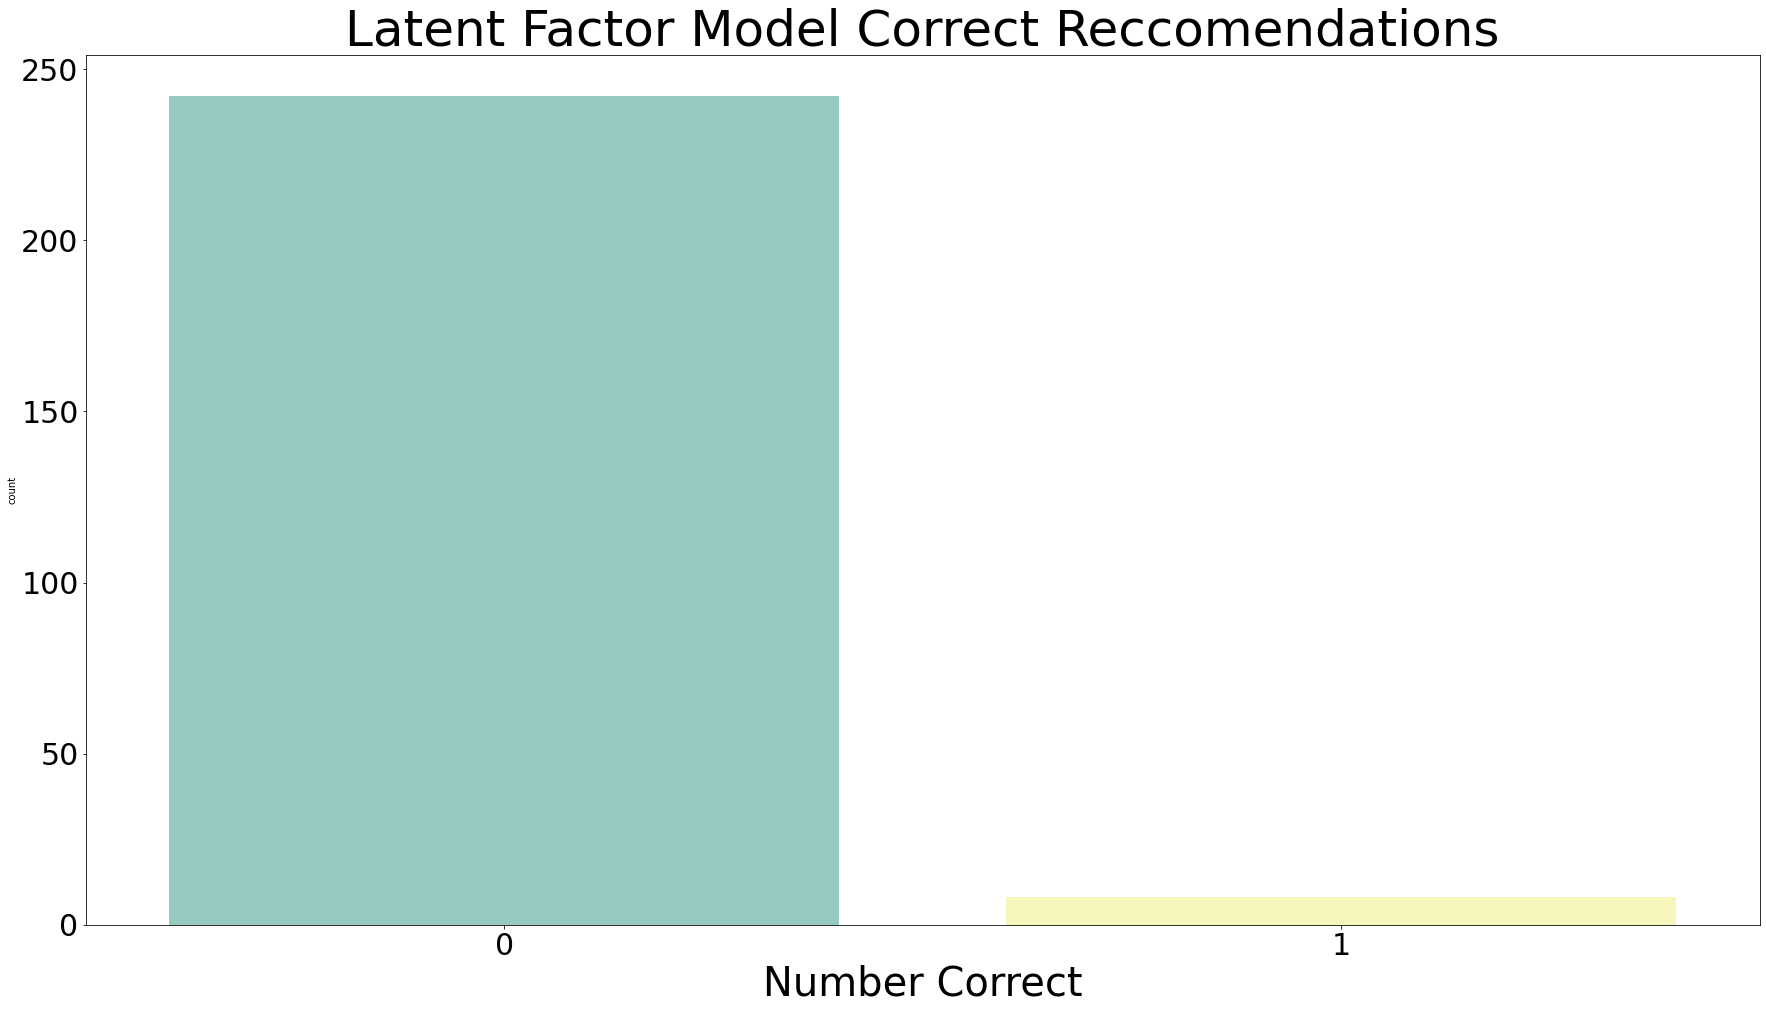

In [60]:
#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accuracies,palette="Set3")
catcnt.axes.set_title("Latent Factor Model Correct Reccomendations",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

In [44]:
# tru positive Rate
accuracies["Accuracy"].sum()
#/ len(list(testdata.ProductID.unique()))

# sum cat = 33 # sub cat = 34 # pairs


37

In [46]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 36.5 MB/s eta 0:00:01
     |████████████████████████████████| 10.3 MB 130.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 104.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 105.4 MB/s eta 0:00:01


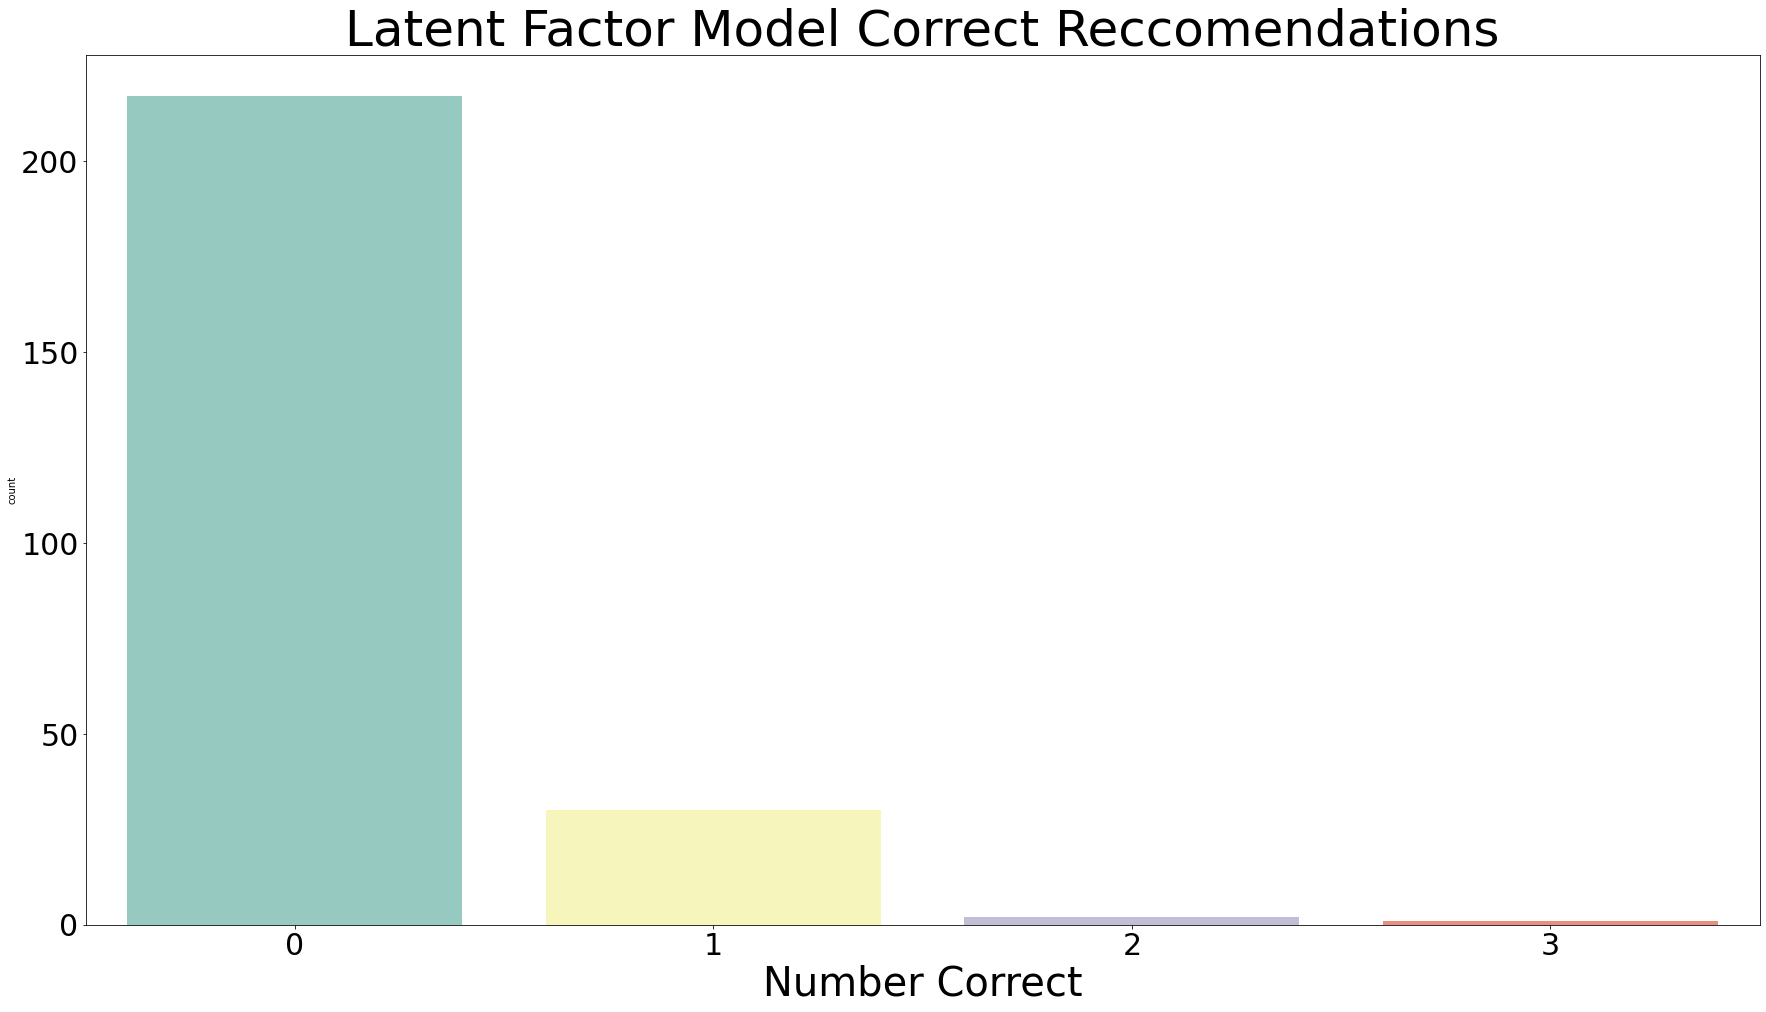

In [47]:
#1/5 of the recommendation were correct

plt.figure(figsize=(30,16))
catcnt = sns.countplot(x="Accuracy", data=accuracies,palette="Set3")
catcnt.axes.set_title("Latent Factor Model Correct Reccomendations",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)

In [74]:
testdata = ratings1[ratings1.END_USER_ID.isin(test)]

bs = testdata.groupby('END_USER_ID')['TOTAL_SPENT'].unique()
big = pd.DataFrame({'User':bs.index, 'Spent':bs.values})
big = big.sort_values(['Spent'], ascending=False).head(250)
## sample top 300 biggest spending customers

input1 = big.User.tolist()
input1

[15,
 1,
 11,
 24,
 15330,
 15416,
 18,
 283,
 120,
 3,
 10748,
 355,
 108,
 2,
 284,
 156,
 335,
 7049,
 797,
 652,
 2455,
 32326,
 31560,
 39819,
 102,
 43137,
 119,
 121,
 356,
 3710,
 1621,
 11826,
 2150,
 808,
 5140,
 24422,
 123,
 1367,
 13218,
 6854,
 2061,
 1012,
 1499,
 197,
 750,
 1978,
 58013,
 12,
 661,
 8197,
 199,
 2658,
 19,
 996,
 39948,
 21572,
 151,
 1366,
 3015,
 2897,
 126,
 150,
 20745,
 1620,
 1022,
 107,
 438,
 97,
 312,
 67963,
 2716,
 3709,
 152,
 4746,
 437,
 11946,
 39895,
 6895,
 10436,
 363,
 20,
 321,
 269,
 7016,
 13726,
 657,
 502,
 1541,
 19568,
 5552,
 2898,
 795,
 5515,
 1537,
 3713,
 3923,
 10456,
 504,
 798,
 31148,
 109,
 263,
 39890,
 268,
 81818,
 1839,
 13158,
 3918,
 637,
 469,
 3714,
 2248,
 25,
 2493,
 1791,
 505,
 1013,
 2718,
 127,
 8223,
 11521,
 2464,
 7676,
 4445,
 122,
 3919,
 2541,
 6493,
 1363,
 1017,
 7686,
 81624,
 198,
 39859,
 29,
 2551,
 710,
 711,
 984,
 1841,
 1369,
 1711,
 157,
 1225,
 1223,
 2717,
 2151,
 201,
 77074,
 930,
 

In [75]:
len(test)

255

In [76]:
accuracies = pd.DataFrame({'UserID':input1})


accuracies

,UserID
0,15
1,1
2,11
3,24
4,15330
...,...
245,6807
246,14048
247,436
248,41


In [77]:
accuracies['Accuracy'] = accuracies['UserID'].apply(lambda x: getAccuracy2(x))
accuracies

t
t
t
t
t
t
t
t
t
t
t
yes
t
yes
t
t
t
yes
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
yes
yes
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
yes
t
t
t
t
t
yes
yes
t
yes
t
yes
t
t
t
yes
t
t
t
t
t
t
t
t
t
yes
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
yes
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
yes
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
yes
t
t
yes
t
t
yes
t
t
t
yes
yes
yes
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
yes
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t
t


,UserID,Accuracy
0,15,0
1,1,0
2,11,0
3,24,0
4,15330,0
...,...,...
245,6807,0
246,14048,0
247,436,0
248,41,0


In [78]:
accuracies["Accuracy"].sum()

37

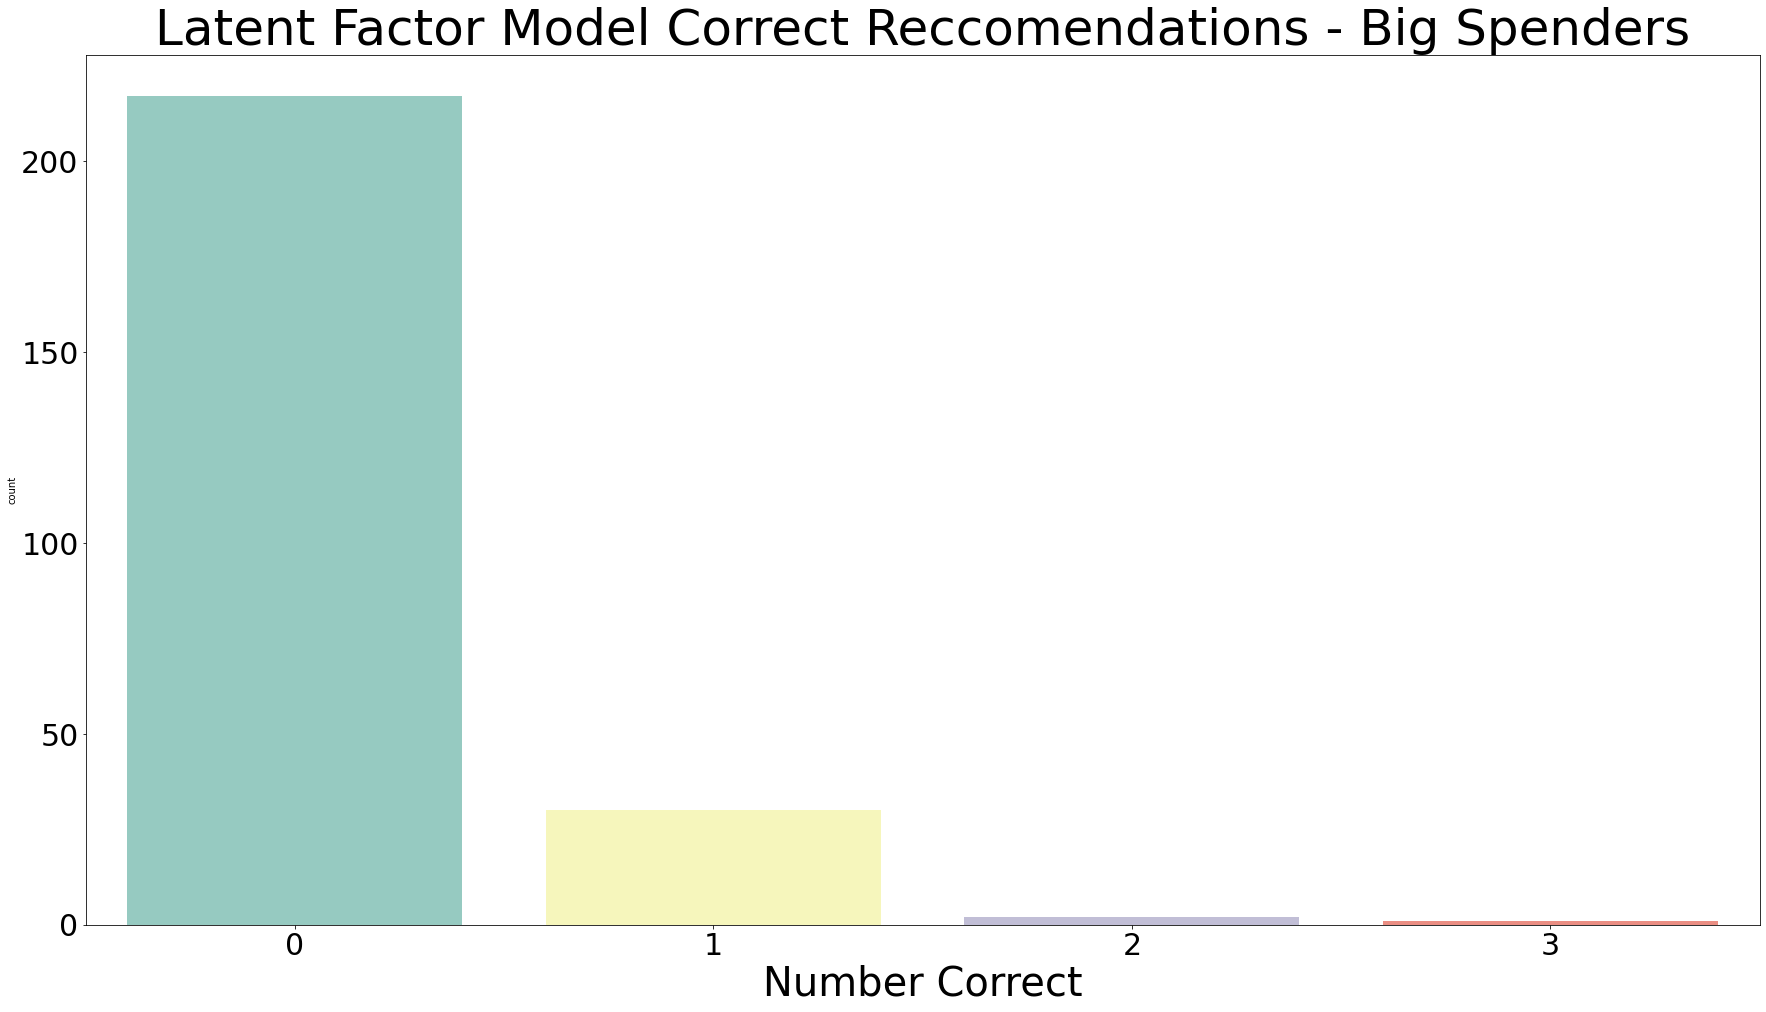

In [79]:

plt.figure(figsize=(30,16))

catcnt = sns.countplot(x="Accuracy", data=accuracies,palette="Set3")
catcnt.axes.set_title("Latent Factor Model Correct Reccomendations - Big Spenders",fontsize=50)
catcnt.set_xlabel("Number Correct",fontsize=40)
catcnt.tick_params(labelsize=30)